## ***10.SVM***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.svm import SVC

#### Task 1 EDA

In [2]:
pharma=pd.read_csv('Pharma_Industry.csv')

In [3]:
pharma.shape

(500, 6)

In [4]:
pharma.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [5]:
pharma.duplicated().sum()

np.int64(0)

In [6]:
pharma.isna().sum()

,0
Drug Dosage (mg),0
Systolic Blood Pressure (mmHg),0
Heart Rate (BPM),0
Liver Toxicity Index (U/L),0
Blood Glucose Level (mg/dL),0
Drug Response,0


In [7]:
pharma.dtypes

,0
Drug Dosage (mg),float64
Systolic Blood Pressure (mmHg),float64
Heart Rate (BPM),float64
Liver Toxicity Index (U/L),float64
Blood Glucose Level (mg/dL),float64
Drug Response,int64


#### Task 2 Data Preprocessing

array([[<Axes: title={'center': 'Drug Dosage (mg)'}>,
        <Axes: title={'center': 'Systolic Blood Pressure (mmHg)'}>],
       [<Axes: title={'center': 'Heart Rate (BPM)'}>,
        <Axes: title={'center': 'Liver Toxicity Index (U/L)'}>],
       [<Axes: title={'center': 'Blood Glucose Level (mg/dL)'}>,
        <Axes: title={'center': 'Drug Response'}>]], dtype=object)

<Figure size 800x1000 with 0 Axes>

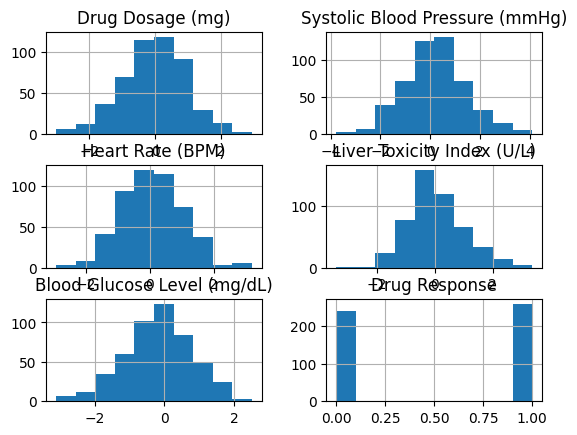

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))

pharma.hist()
#variables seems almost normally distributed with some extreme values

<Axes: >

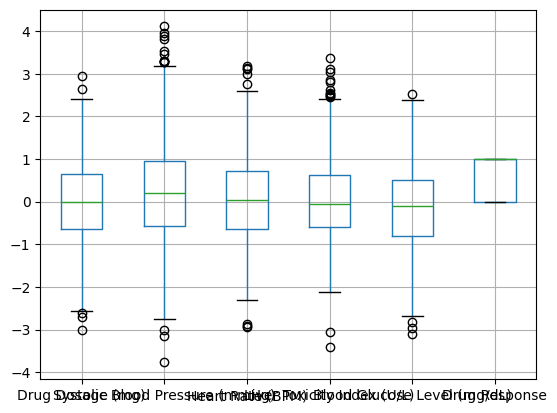

In [9]:
pharma.boxplot()

In [10]:
def outlier_capping(pharma,column):
 Q1=pharma[column].quantile(0.25)
 Q3=pharma[column].quantile(0.75)
 IQR=Q3-Q1
 UE=Q3+1.5*IQR
 LE=Q1-1.5*IQR
 pharma[column]=pharma[column].apply(lambda x:UE if x>UE else LE if x<LE else x)
for col in pharma.select_dtypes(["int",'float']).columns:
 outlier_capping(pharma,col)

<Axes: >

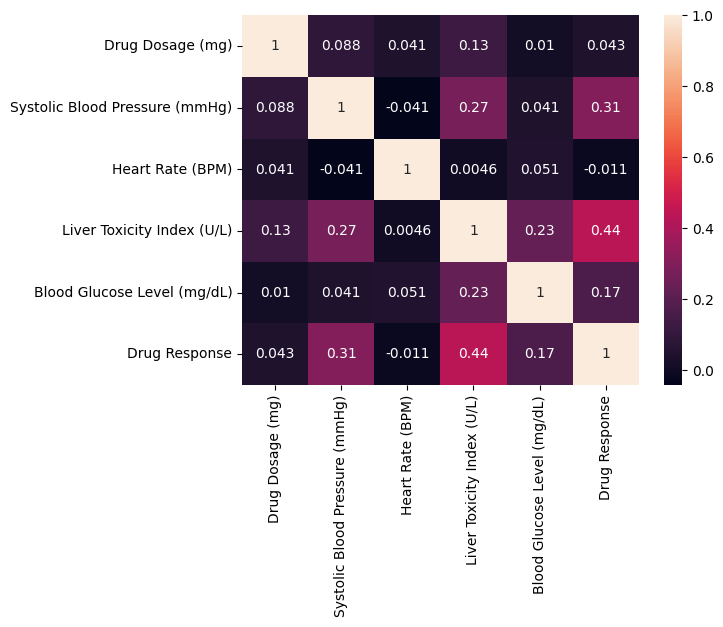

In [11]:
corr=pharma.corr()
sns.heatmap(corr,annot=True)

#### Task 3 Data Visualisation

In [12]:
target=pharma[['Drug Response']]
features=pharma.drop(columns=['Drug Response'])

In [13]:
std=StandardScaler()
pd.DataFrame(std.fit_transform(features),columns=features.columns)
pharma.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.463913,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [14]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 5)
(100, 5)
(400, 1)
(100, 1)


#### Task 4 (SVM Implementation)

In [15]:
svc=SVC()
#as it is classification model

#### Task 6 Parameter tuning and Optimization


In [16]:
###GridSearch to eperiment with different hyperparameters and optimize SVM
import warnings
warnings.filterwarnings('ignore')
params={'C':range(1,10),'kernel':['linear','poly','rbf','sigmoid'],'gamma':np.arange(0,1,0.1)}
grid_search=GridSearchCV(svc,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'C': 4, 'gamma': np.float64(0.1), 'kernel': 'rbf'}

In [17]:
svc=SVC(C=4,gamma=0.1,kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)
#here accuracy score gives the proportion of correctly predicted instances
#i.e true positives and true negatives

0.7

In [18]:
print(classification_report(y_test,y_pred))
'''
Precision (0.77): This means that when  model predicted someone did not have diabetes (Class 0),
 it was correct 77% of the time. It tells  about the accuracy of positive predictions.
Recall (0.84): This means that out of all the people who actually did not have diabetes
(true Class 0),  model correctly identified 84% of them. It tells us how many of the
actual positives the model captured.
'''

              precision    recall  f1-score   support

           0       0.57      0.78      0.66        37
           1       0.84      0.65      0.73        63

    accuracy                           0.70       100
   macro avg       0.70      0.72      0.70       100
weighted avg       0.74      0.70      0.71       100



'\nPrecision (0.77): This means that when  model predicted someone did not have diabetes (Class 0),\n it was correct 77% of the time. It tells  about the accuracy of positive predictions.\nRecall (0.84): This means that out of all the people who actually did not have diabetes\n(true Class 0),  model correctly identified 84% of them. It tells us how many of the\nactual positives the model captured.\n'

#### Task 5 Visualisation of SVM Results

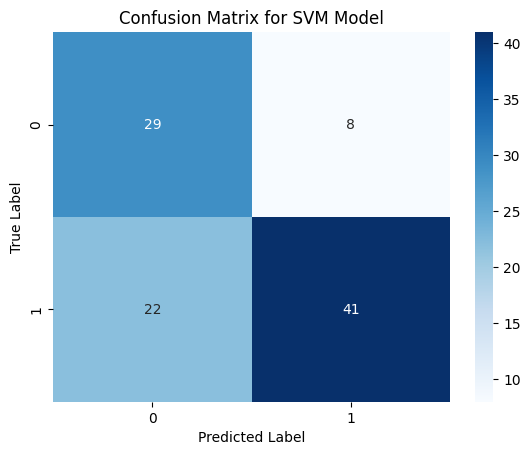

In [19]:
conf_svm = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()

In [20]:
'''
True Negatives (TN):

These are the instances where the actual label was 0 (no drug response) and
\the model predicted 0 (no drug response).
 Our model correctly identified 29 cases where there was no drug response.

 False Positives (FP):

These are the instances where the actual label was 0 (no drug response), but the model predicted 1 (drug response). This means your model incorrectly predicted a drug response for 8 cases where there wasn't one. These are also known as Type I errors.
 False Negatives (FN):

These are the instances where the actual label was 1 (drug response), but the model predicted 0 (no drug response). Your model failed to identify a drug response in 22 actual cases. These are also known as Type II errors.
'''

"\nTrue Negatives (TN):\n\nThese are the instances where the actual label was 0 (no drug response) and\n\the model predicted 0 (no drug response).\n Our model correctly identified 29 cases where there was no drug response.\n\n False Positives (FP):\n\nThese are the instances where the actual label was 0 (no drug response), but the model predicted 1 (drug response). This means your model incorrectly predicted a drug response for 8 cases where there wasn't one. These are also known as Type I errors.\n False Negatives (FN):\n\nThese are the instances where the actual label was 1 (drug response), but the model predicted 0 (no drug response). Your model failed to identify a drug response in 22 actual cases. These are also known as Type II errors.\n"

#### Task 7 Comparison and Analysis

In [21]:
svc=SVC(C=1,gamma=0.1,kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.73

In [22]:
svc=SVC(C=4,gamma=0.1,kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.67

In [23]:
svc=SVC(C=4,gamma=0.1,kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7